In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
start = '2015-01-01'
end = '2024-06-25'
stock = 'AAPL'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402172,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714722,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716963,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049519,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973555,237458000
...,...,...,...,...,...,...,...
2379,2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
2380,2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300
2381,2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500
2382,2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,246421400


In [5]:
ma_200 = data.Close.rolling(200).mean()
ma_100 = data.Close.rolling(100).mean()
ma_50 = data.Close.rolling(50).mean()

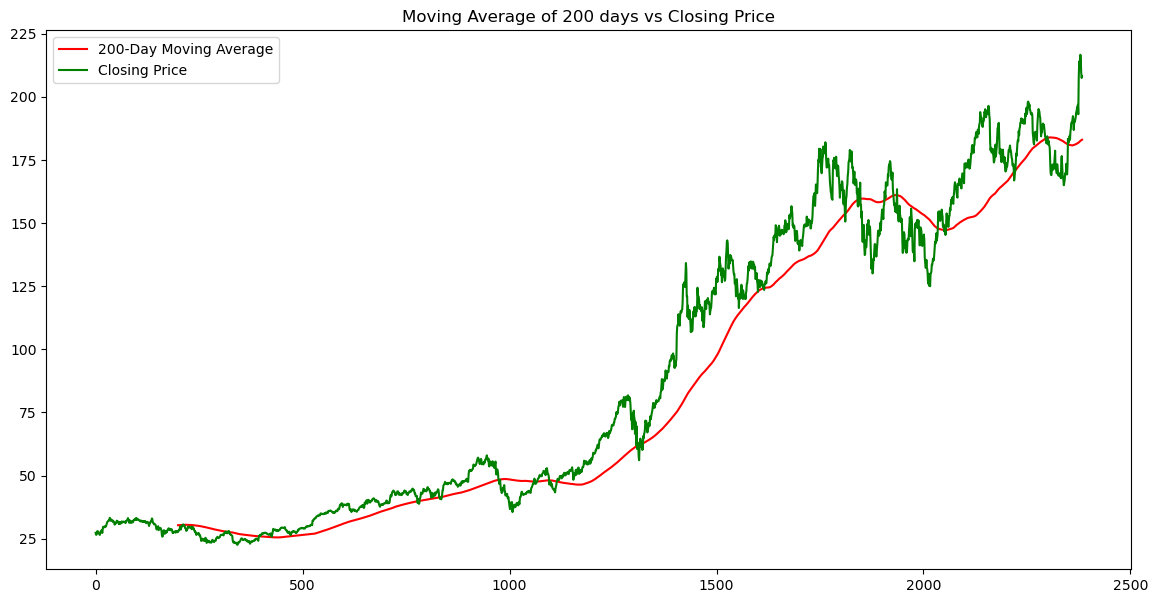

In [6]:
plt.figure(figsize=(14,7))
plt.plot(ma_200, 'r', label='200-Day Moving Average')
plt.plot(data.Close, 'g', label='Closing Price')
plt.title('Moving Average of 200 days vs Closing Price')
plt.legend()
plt.show()

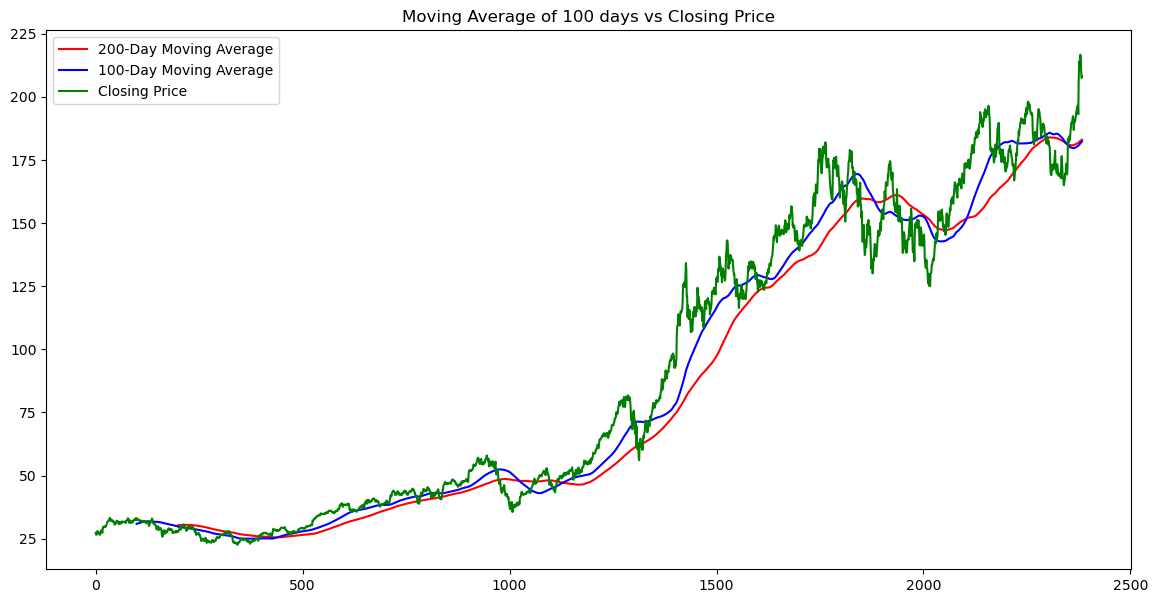

In [7]:
plt.figure(figsize=(14,7))
plt.plot(ma_200, 'r', label='200-Day Moving Average')
plt.plot(ma_100, 'b', label='100-Day Moving Average')
plt.plot(data.Close, 'g', label='Closing Price')
plt.title('Moving Average of 100 days vs Closing Price')
plt.legend()
plt.show()

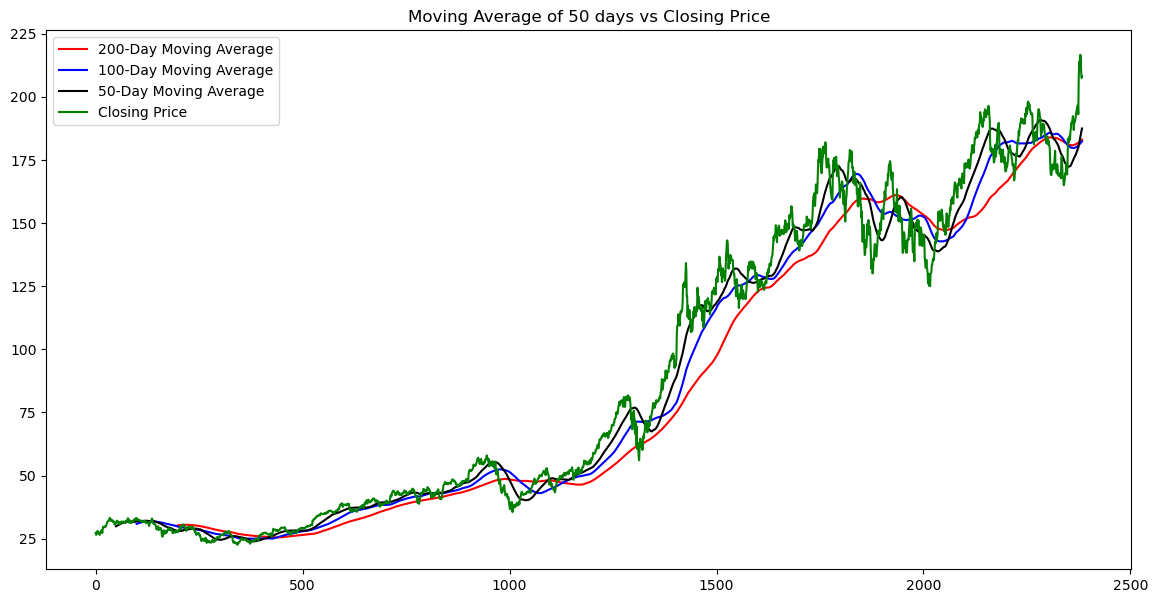

In [8]:
plt.figure(figsize=(14,7))
plt.plot(ma_200, 'r', label='200-Day Moving Average')
plt.plot(ma_100, 'b', label='100-Day Moving Average')
plt.plot(ma_50, 'black', label='50-Day Moving Average')
plt.plot(data.Close, 'g', label='Closing Price')
plt.title('Moving Average of 50 days vs Closing Price')
plt.legend()
plt.show()

In [9]:
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [10]:
data_train.shape[0]

1907

In [11]:
data_test.shape[0]

477

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

In [13]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x,y = np.array(x),np.array(y)

In [14]:
from keras.layers import LSTM, Dropout , Dense
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation = 'relu',return_sequences=True,
               ))
model.add(Dropout(0.3))    
model.add(LSTM(units = 80,activation = 'relu',return_sequences=True,))
model.add(Dropout(0.4))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/Users/yashi/anaconda3/envs/example/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [17]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 4.8478e-05 - loss: 0.0691
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 6.9898e-04 - loss: 0.0066
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.0018 - loss: 0.0057
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 8.2844e-04 - loss: 0.0068
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - accuracy: 6.8847e-04 - loss: 0.0048
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 4.4643e-04 - loss: 0.0062
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - accuracy: 6.1647e-04 - loss: 0.0049
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accuracy: 5.9495e-04 - loss: 0.0045
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 6.2544e-04 - loss: 0.0054
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.0045 - loss: 0.0055
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.0011 - loss: 0.0063
Epoch 12/50
57/57 ━

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [19]:
pas_100_days = data_train.tail()
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

In [20]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [21]:
y_predict = model.predict(x)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [22]:
scale = 1/scaler.scale_

In [23]:
y_predict = y_predict*scale
y=y*scale

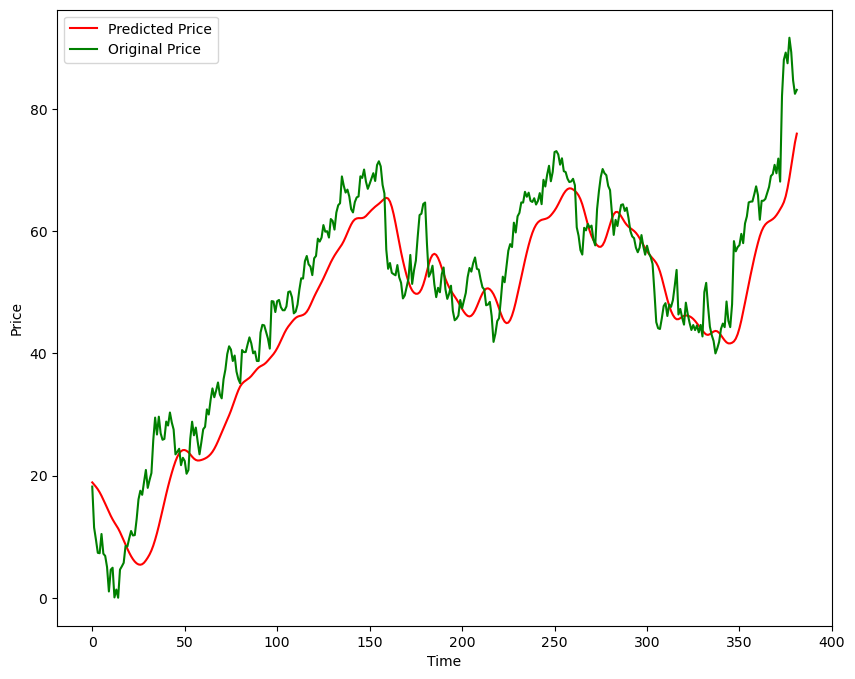

In [24]:
plt.figure(figsize=(10, 8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show() 

In [25]:
model.save('Stck_price.keras')

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y, y_predict)
mae = mean_absolute_error(y, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_predict)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 55.64
Mean Absolute Error (MAE): 6.04
Root Mean Squared Error (RMSE): 7.46
R-squared (R2): 0.83
